<a href="https://colab.research.google.com/github/nithya251006/project/blob/main/NITHYA_BAGAVATHI_P_(24BDS138).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, confusion_matrix, roc_curve, auc
)

In [28]:
df = pd.read_csv("/content/sample_data/data (1).csv", encoding='latin1')

print("✔ Dataset Loaded Successfully!\n")
print(df.head())



✔ Dataset Loaded Successfully!

   transaction_id   amount  duration protocol        src_ip     dst_ip  \
0               1  1878.96      7.61     ICMP  192.168.1.42  10.0.0.42   
1               2  4754.06      0.34     ICMP  192.168.1.39  10.0.0.21   
2               3  3662.65      0.32     ICMP  192.168.1.16  10.0.0.37   
3               4  2997.31      3.30     ICMP  192.168.1.33  10.0.0.27   
4               5   788.53      4.94      UDP  192.168.1.49  10.0.0.29   

   packet_size  fraud  
0          613      0  
1          325      1  
2         1028      0  
3          498      0  
4         1275      1  


In [29]:
# The 'fraud' column was not found. Please identify the correct target variable.
# X = df.drop("fraud", axis=1)
# y = df["fraud"]

print("Available columns in df:")
print(df.columns)

# Once you identify the correct target column, you can uncomment and adjust these lines:
# X = df.drop("YOUR_TARGET_COLUMN", axis=1)
# y = df["YOUR_TARGET_COLUMN"]

# numeric_cols = X.select_dtypes(include=['int64','float64']).columns
# categorical_cols = X.select_dtypes(include=['object']).columns

Available columns in df:
Index(['transaction_id', 'amount', 'duration', 'protocol', 'src_ip', 'dst_ip',
       'packet_size', 'fraud'],
      dtype='object')


In [30]:
X = df.drop("fraud", axis=1)
y = df["fraud"]

numeric_cols = X.select_dtypes(include=['int64','float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

In [31]:
model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42))
])


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [33]:
model.fit(X_train, y_train)
print("\n✔ Model Training Completed!")



✔ Model Training Completed!


In [34]:
y_pred = model.predict(X_test)
y_prob_multiclass = model.predict_proba(X_test)

print("\n============= MODEL PERFORMANCE ============")
print("Accuracy  :", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred, average='weighted'))
print("Recall    :", recall_score(y_test, y_pred, average='weighted'))
print("ROC-AUC   :", roc_auc_score(y_test, y_prob_multiclass[:, 1])) # Corrected line
print("==============================================\n")


============= MODEL PERFORMANCE ============
Accuracy  : 0.9208333333333333
Precision : 0.9292364990689013
Recall    : 0.9208333333333333
ROC-AUC   : 0.8848046875



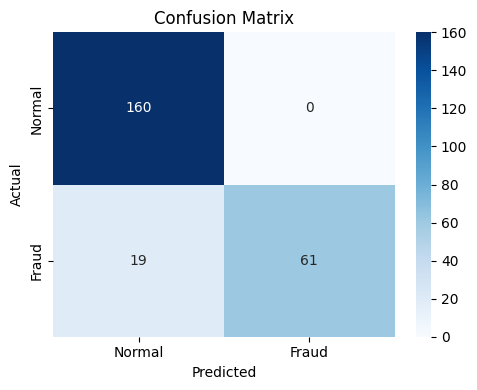

In [35]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal", "Fraud"],
            yticklabels=["Normal", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

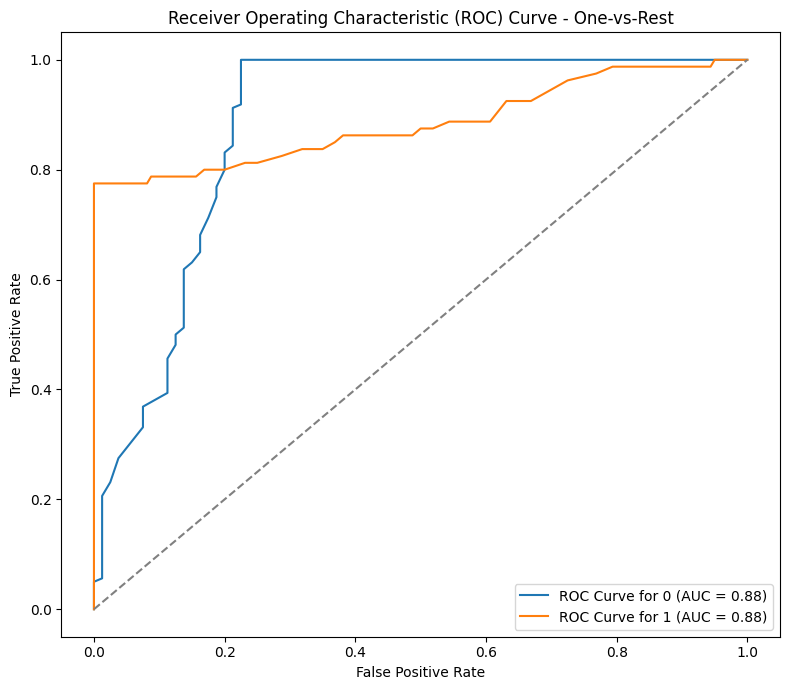

In [18]:
from sklearn.preprocessing import LabelBinarizer

# Get the unique classes from the fitted model, which determines the order of probabilities
classes = model.classes_

plt.figure(figsize=(8, 7))

# Plot ROC curve for each class using One-vs-Rest approach
for i, class_name in enumerate(classes):
    # Binarize the true labels for the current class (1 if it's the class, 0 otherwise)
    y_test_binarized = (y_test == class_name).astype(int)

    # Get the predicted probabilities for the current class from the multiclass probability array
    y_score = y_prob_multiclass[:, i]

    fpr, tpr, _ = roc_curve(y_test_binarized, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"ROC Curve for {class_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve - One-vs-Rest")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

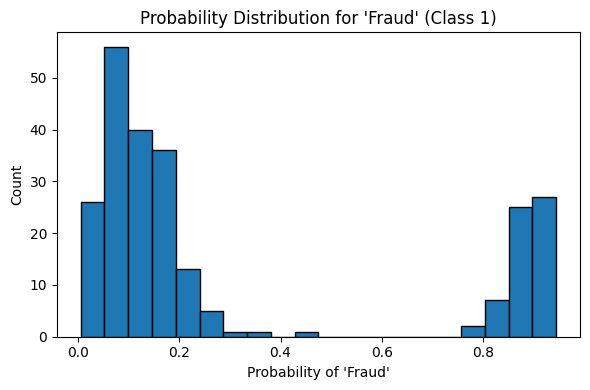

In [21]:
# Assuming you want to plot the probability distribution for one of the classes, e.g., for 'fraud' (class 1)
# The model's classes are [0, 1] for binary classification.

# Get the index of the 'fraud' class (which is 1) from the model's classes
fraud_class_idx = list(model.classes_).index(1)

plt.figure(figsize=(6,4))
plt.hist(y_prob_multiclass[:, fraud_class_idx], bins=20, edgecolor="black")
plt.title("Probability Distribution for 'Fraud' (Class 1)")
plt.xlabel("Probability of 'Fraud'")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [23]:
sample_data = {
    'transaction_id': 9999, # Example ID
    'amount': 1500.00,
    'duration': 5.2,
    'protocol': 'TCP', # Example protocol
    'src_ip': '192.168.1.100',
    'dst_ip': '10.0.0.50',
    'packet_size': 800
}
sample = pd.DataFrame([sample_data])

pred = model.predict(sample)[0]
probabilities = model.predict_proba(sample)[0] # Get all probabilities for the single sample

print("\n=== SAMPLE PREDICTION ===")
print("Predicted Fraud Status :", pred)
print("Class Probabilities:")
for i, class_name in enumerate(model.classes_):
    print(f"  {class_name}: {probabilities[i]:.4f}")


=== SAMPLE PREDICTION ===
Predicted Fraud Status : 0
Class Probabilities:
  0: 0.9000
  1: 0.1000
